# Hotel Booking Cancellation Prediction

## 1. Problem Definition and Background

Predicting hotel booking cancellations is crucial for several reasons. Firstly, it plays a significant role in financial forecasting, as cancellations can cost hotels millions annually due to lost bookings and operational inefficiencies. For instance, a study found that hotels with high cancellation rates often struggle with revenue management, leading to significant financial losses. By accurately predicting cancellations, hotels can better manage their financial resources and make informed budgetary decisions. Secondly, effective resource allocation is essential for operational efficiency; understanding cancellation patterns allows hotels to optimize staffing, inventory, and other resources to meet demand, thereby reducing issues like overbooking and unused inventory.

Key stakeholders in this process include revenue managers, who can use prediction models to dynamically adjust prices and avoid cancellations; hotel managers, who oversee daily operations and strategic planning; marketing teams, who can tailor promotions and campaigns based on cancellation trends; and customers, who benefit from fewer overbookings and improved service delivery. The rise in online booking flexibility and the impact of COVID-19 have further exacerbated cancellation rates, making it even more critical for hotels to adopt predictive measures.

Revenue managers can use prediction models to dynamically adjust prices and avoid cancellations, addressing their challenge of revenue loss due to unpredictable booking behaviors. By leveraging insights from cancellation predictions, they can implement targeted pricing strategies that minimize the risk of cancellations during peak booking periods.

Hotel managers benefit from understanding cancellation patterns, allowing them to optimize staffing and resource allocation. This insight helps them mitigate operational inefficiencies and ensure that they can meet customer demand without overstaffing or underutilizing resources.

Marketing teams can tailor promotions and campaigns based on cancellation trends, directly addressing the challenge of attracting and retaining customers. By understanding when cancellations are likely to occur, they can create targeted marketing strategies that encourage bookings during those times.

Customers benefit from fewer overbookings and improved service, as hotels can better manage their inventory and ensure that reservations are honored. This leads to a more reliable booking experience, enhancing customer satisfaction and loyalty.

Key stakeholders in this process include hotel managers, who oversee daily operations and strategic planning; marketing teams, who can tailor promotions and campaigns based on cancellation trends; and booking agents, who need to manage customer expectations and improve service delivery. 

The solution benefits hotel operations by enabling proactive measures to mitigate the impact of cancellations, such as adjusting pricing strategies or enhancing customer engagement. Additionally, it improves the overall customer experience by ensuring that hotels can maintain service quality and availability, even in the face of potential cancellations.

## 2. Data Section

### 2.1 Data Overview

The dataset consists of 119,390 hotel records, where each record represents a single booking. The target variable for our analysis is `is_canceled`, which indicates whether a booking was canceled.

### 2.2 Missing Values

We will drop variables with more than 500 missing values and remove individual observations with missing values in critical columns such as `lead_time`, `arrival_date_year`, and `number_of_special_requests`.

### 2.3 Exploratory Data Analysis (EDA)

Conducting EDA will help us understand the data better. We will visualize the distribution of cancellations and analyze the relationships between features.

### 2.4 Train/Test Split

We will split the dataset into training and testing sets to evaluate our model's performance.

## 3. Model

### 3.1 Decision Tree Construction

We will build a decision tree classifier with a maximum depth of 5 to ensure the tree is drawable. We will evaluate the model using a confusion matrix, accuracy, precision, recall, and F1 score. Additionally, we will plot feature importance and the precision-recall curve, as well as the ROC curve. Cross-validation (k=10) will be used to show average accuracy.

### 3.2 Pruning Techniques: Pre-pruning

#### a1. Hyperparameter Tuning

We will use grid search to find the best parameters for the decision tree, testing different values for `max_depth` and `max_leaf_nodes`.

#### a2. Visualization

A heatmap or line chart will be created to show model performance across different parameters.

#### a3. Report Results

After selecting the best parameters, we will report the confusion matrix, performance measures (accuracy, recall, precision, F1 score), and feature importance.

### 3.3 Run Other Models

#### a. K-Nearest Neighbors (KNN)

We will classify the dataset using KNN and report the confusion matrix and performance measures.

#### b. Logistic Regression

We will classify the dataset using logistic regression and report the confusion matrix and performance measures.

## 4. Conclusions

### 4.1 Best Model

We will compare the performance of the decision tree, KNN, and logistic regression to determine which model provides the best accuracy, recall, and precision.
 
### 4.2 Managerial Implications

Insights from the decision tree, particularly feature importance, will be interpreted to provide actionable recommendations for hotel management.

## High-Level Outline and Brief Background
 
The problem at hand is the high rate of booking cancellations in the hotel industry, which can lead to significant revenue loss and operational inefficiencies. Understanding the factors that contribute to cancellations is crucial for hotels to improve their booking strategies and customer satisfaction.
 
This issue is important as it directly impacts the financial health of hotels and their ability to manage resources effectively. By analyzing cancellation patterns, hotels can implement targeted marketing strategies, optimize pricing, and enhance customer service.

Key stakeholders include hotel management, marketing teams, revenue managers, and ultimately the customers themselves. Hotel management needs insights to make informed decisions, while marketing teams can tailor their campaigns based on cancellation trends. Revenue managers can adjust pricing strategies to mitigate losses, and customers benefit from improved services and offerings.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Loading Data

In [2]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Hide the root window
Tk().withdraw()

# Prompt the user to select a CSV file
file_path = askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])

# Load the dataset
data = pd.read_csv(file_path)

# Data Overview
print(data.info())
print(data.describe())


2024-11-21 21:22:42.225 Python[28902:22648831] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-21 21:22:42.798 Python[28902:22648831] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Overview

In [3]:
# Print the head of the dataset
print("Head of the dataset:\n", data.head())

# Print the description of the dataset
print("Description of the dataset:\n", data.describe())

# Print the data types of each column
print("Data types of each column:\n", data.dtypes)


Head of the dataset:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1           

# Data Exploration

## Data Cleaning

In [4]:
# Print unique values for 'arrival_date_month' before conversion
print("Unique values in 'arrival_date_month':", data['arrival_date_month'].unique())
# Convert 'arrival_date_month' to int64 by mapping month names to their corresponding numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping).astype(np.int64)

# Convert all object types to category if applicable
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                       'customer_type', 'arrival_date_month']

for col in categorical_columns:
    # Print unique values for each categorical column before conversion
    print(f"Unique values in '{col}':", data[col].unique())
    data[col] = data[col].astype('category')

Unique values in 'arrival_date_month': ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values in 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in 'meal': ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in 'country': ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'E

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Provide a summary of missing data handling
print("\nSummary of missing data handling:")
print("1. Columns with more than 500 missing values will be dropped.")
print("2. Individual observations with missing values in the 'country' variable will be removed.")
print("3. 'agent' and 'company' columns will have NaN values filled with 0.")
print("4. 'country' column will have NaN values filled with 'Unknown' after adding it as a category.")

Missing values in each column:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                    

## Fill or Drop Null values:

Drop agent and company, replace country with Unknown, fill agent and company with 0

This are the values of missing data (from the print statement above):

    agent                              16340
    company                           112593
    country                              488


In [6]:
# Print the unique rows where the column 'country' is NA
na_country_rows = data[data['country'].isnull()].drop_duplicates()
print("Unique rows where 'country' is NA:\n", na_country_rows)

# how many agent or company rowsare NaN?
print(data['agent'].isnull().sum())
print(data['company'].isnull().sum())

# Drop the 'agent' and 'company' columns from the dataset
data = data.drop(columns=['agent', 'company'])

# Set the categories for 'country' before filling NaN
data['country'] = data['country'].cat.add_categories(['Unknown'])
# Fill the Null country with 'Unknown'
data['country'] = data['country'].fillna('Unknown')


Unique rows where 'country' is NA:
                hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
4127    Resort Hotel            1          0               2016   
7092    Resort Hotel            1          8               2016   
7860    Resort Hotel            1         39               2016   
8779    Resort Hotel            1          0               2016   
...              ...          ...        ...                ...   
60651     City Hotel            1          0               2016   
61244     City Hotel            1          0               2016   
65907     City Hotel            1          0               2017   
80830     City Hotel            0          4               2015   
101488    City Hotel            0          1               2016   

       arrival_date_month  arrival_date_week_number  \
30                      7                        27   
4127                    2                        

In [7]:
# Dropping individual observations with missing values in the 'country' variable
data = data.dropna(subset=['country'])

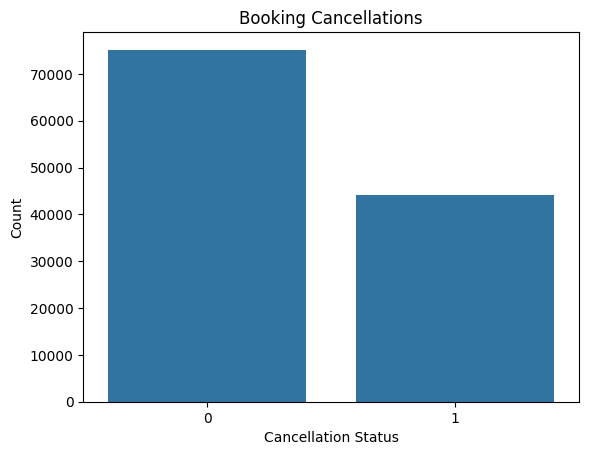

All columns in the dataset:
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [8]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of cancellations
sns.countplot(x='is_canceled', data=data)
plt.title('Booking Cancellations')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

# Print all columns
print("All columns in the dataset:\n", data.columns.tolist())


In [9]:
def drop_outliers(data, column, lower_percentile=2.5, upper_percentile=97.5):
    if column not in data.columns:
        print(f"Warning: '{column}' does not exist in the data. Outlier removal skipped.")
        return data
    lower_bound = data[column].quantile(lower_percentile / 100)
    upper_bound = data[column].quantile(upper_percentile / 100)
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Drop outliers for 'lead_time' and 'adr' before plotting
data = drop_outliers(data, 'lead_time')
data = drop_outliers(data, 'adr')

# Plotting Functions to visualize the data

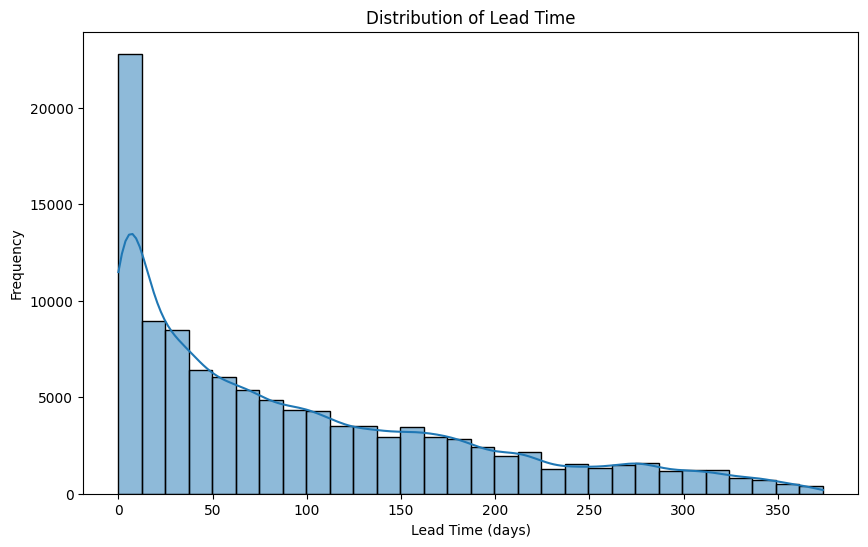

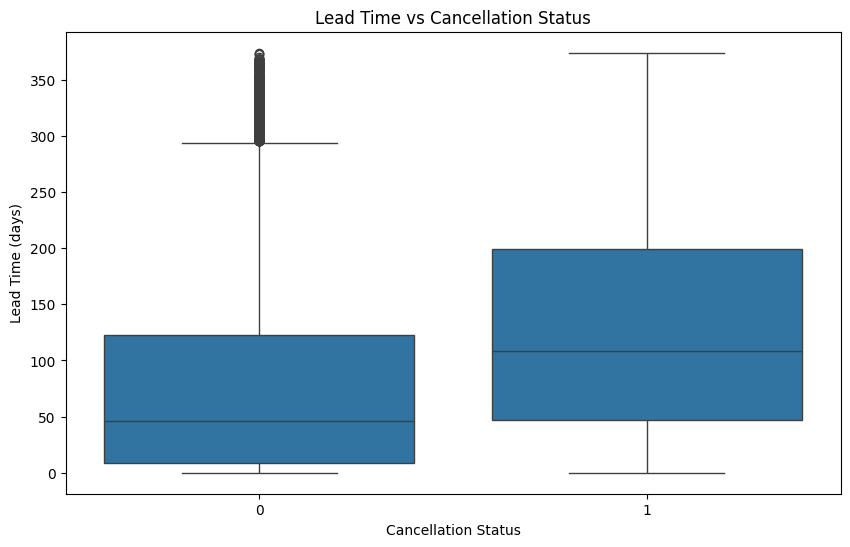

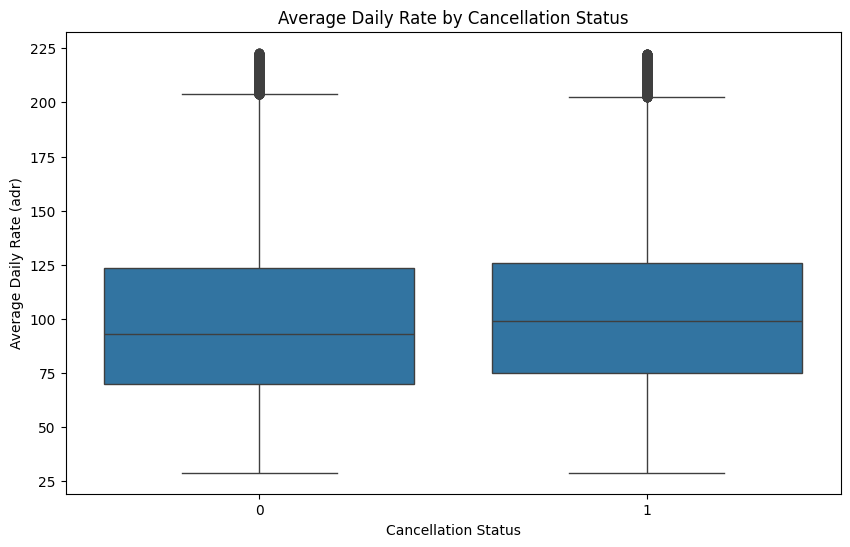

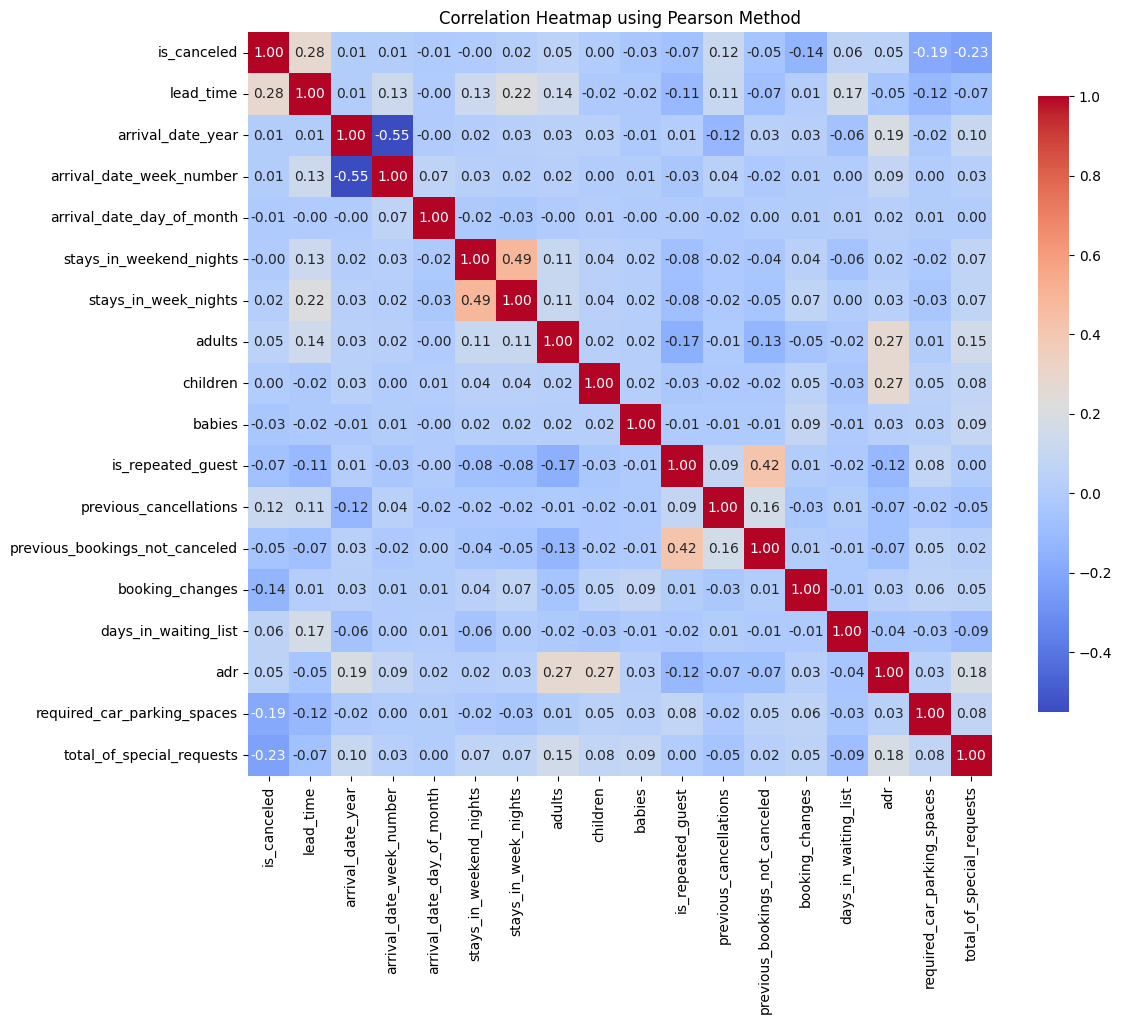

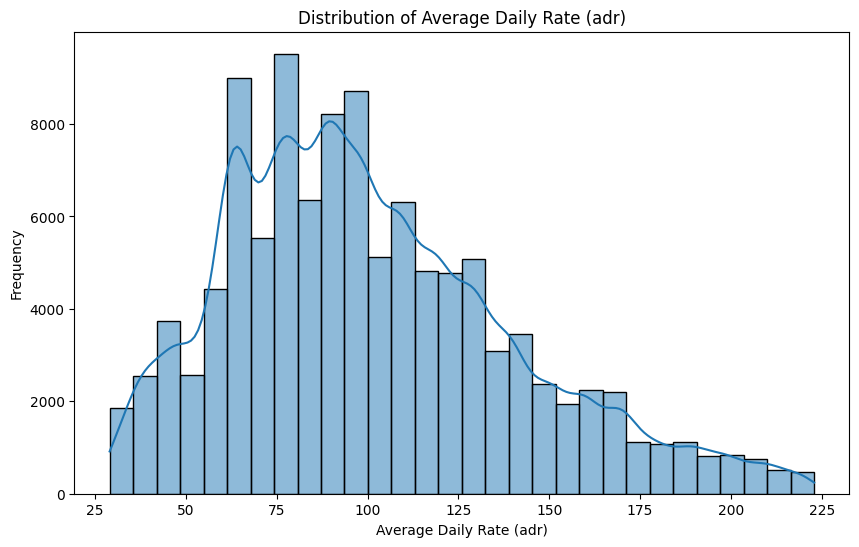

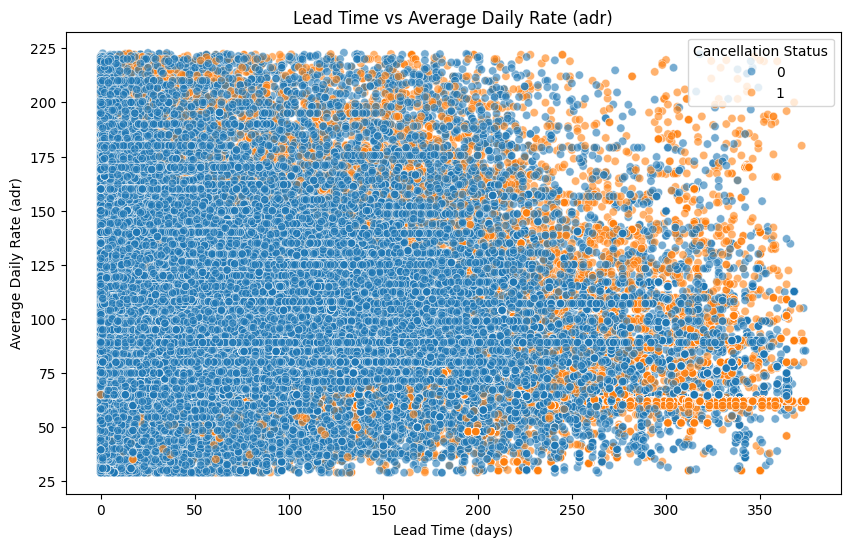

country      ABW  AGO  ALB  AND  ARE  ARG  ARM  ASM  ATA  ATF  ...   USA  UZB  \
is_canceled                                                    ...              
0              2  145   10    0    6  158    5    1    2    1  ...  1495    2   
1              0  191    2    3   40   51    2    0    0    0  ...   461    2   
All            2  336   12    3   46  209    7    1    2    1  ...  1956    4   

country      VEN  VGB  VNM  ZAF  ZMB  ZWE  Unknown     All  
is_canceled                                                 
0             14    0    6   46    1    1      379   69964  
1             12    1    2   30    1    2       57   40647  
All           26    1    8   76    2    3      436  110611  

[3 rows x 177 columns]


In [10]:
def plot_histogram(data, column, title, xlabel, ylabel, bins=30):
    plt.figure(figsize=(10, 6))  # Set the figure size for the histogram
    if column in data.columns:  # Check if the specified column exists in the data
        try:
            # Create a histogram with a kernel density estimate (KDE)
            sns.histplot(data[column].astype(float), bins=bins, kde=True)
            plt.title(title)  # Set the title of the histogram
            plt.xlabel(xlabel)  # Set the x-axis label
            plt.ylabel(ylabel)  # Set the y-axis label
            plt.show()  # Display the histogram
        except ValueError:
            # Handle the case where data cannot be converted to float
            print(f"Warning: Could not convert data in column '{column}' to float. Histogram not created.")
    else:
        # Handle the case where the column does not exist
        print(f"Warning: '{column}' does not exist in the data. Histogram not created.")

def plot_boxplot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))  # Set the figure size for the boxplot
    if y in data.columns:  # Check if the y variable exists in the data
        # Create a boxplot to visualize the distribution of y across different x categories
        sns.boxplot(x=x, y=y, data=data)
        plt.title(title)  # Set the title of the boxplot
        plt.xlabel(xlabel)  # Set the x-axis label
        plt.ylabel(ylabel)  # Set the y-axis label
        plt.show()  # Display the boxplot
    else:
        # Handle the case where the y variable does not exist
        print(f"Warning: '{y}' does not exist in the data. Boxplot not created.")

def plot_correlation_heatmap(data, method='pearson'):
    plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
    # Calculate the correlation matrix for numerical features
    correlation_matrix = data.select_dtypes(include=[np.number]).corr(method=method)  
    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  
    plt.title(f'Correlation Heatmap using {method.capitalize()} Method')  # Set the title of the heatmap
    plt.show()  # Display the heatmap

def plot_scatter(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))  # Set the figure size for the scatter plot
    if x in data.columns and y in data.columns:  # Check if both x and y variables exist in the data
        # Create a scatter plot to visualize the relationship between x and y, colored by hue
        sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=0.6)
        plt.title(title)  # Set the title of the scatter plot
        plt.xlabel(xlabel)  # Set the x-axis label
        plt.ylabel(ylabel)  # Set the y-axis label
        plt.legend(title='Cancellation Status', loc='upper right')  # Add a legend for the hue
        plt.show()  # Display the scatter plot
    else:
        # Handle the case where one of the variables does not exist
        print(f"Warning: One of the variables '{x}' or '{y}' does not exist in the data. Scatter plot not created.")

# Additional EDA: Visualizing correlation between cancellation and one-hot encoded variables
def plot_cancellation_correlation(data):
    # Identify one-hot encoded columns based on a specific prefix
    one_hot_columns = data.columns[data.columns.str.startswith('one_hot_prefix_')]  # Adjust prefix as necessary
    for column in one_hot_columns:
        plt.figure(figsize=(10, 6))  # Set the figure size for each boxplot
        # Create a boxplot to visualize cancellation status against one-hot encoded variables
        sns.boxplot(x='is_canceled', y=column, data=data)
        plt.title(f'Cancellation Status vs {column}')  # Set the title of the boxplot
        plt.xlabel('Cancellation Status')  # Set the x-axis label
        plt.ylabel(column)  # Set the y-axis label
        plt.show()  # Display the boxplot

# Cross-tabulation of cancellation status and another categorical variable (e.g., 'country')
def plot_cancellation_crosstab(data, column):
    if column in data.columns:  # Check if the specified column exists in the data
        # Create a cross-tabulation of cancellation status against the specified column
        crosstab = pd.crosstab(data['is_canceled'], data[column], margins=True)
        print(crosstab)  # Print the cross-tabulation result
    else:
        # Handle the case where the column does not exist
        print(f"Warning: '{column}' does not exist in the data. Cross-tabulation not created.")

# Visualizing the distribution of lead time
plot_histogram(data, 'lead_time', 'Distribution of Lead Time', 'Lead Time (days)', 'Frequency')

# Visualizing the relationship between lead time and cancellations
plot_boxplot(data, 'is_canceled', 'lead_time', 'Lead Time vs Cancellation Status', 'Cancellation Status', 'Lead Time (days)')

# Visualizing the average daily rate (adr) by cancellation status
plot_boxplot(data, 'is_canceled', 'adr', 'Average Daily Rate by Cancellation Status', 'Cancellation Status', 'Average Daily Rate (adr)')

# Correlation heatmap to understand relationships between numerical features
plot_correlation_heatmap(data)

# Visualizing the distribution of average daily rate (adr)
plot_histogram(data, 'adr', 'Distribution of Average Daily Rate (adr)', 'Average Daily Rate (adr)', 'Frequency')

# Visualizing the relationship between lead time and average daily rate (adr)
plot_scatter(data, 'lead_time', 'adr', 'is_canceled', 'Lead Time vs Average Daily Rate (adr)', 'Lead Time (days)', 'Average Daily Rate (adr)')

# Cross-tabulation of cancellation status and country
plot_cancellation_crosstab(data, 'country')

# Visualizing correlation between cancellation and one-hot encoded variables
plot_cancellation_correlation(data)


## One-Hot Encoding

In [11]:
# Use one-hot encoding for all categorical variables ()

data = pd.get_dummies(data, drop_first=True)  # Convert all categorical variables to dummy/indicator variables

# Train/Test Split

In [12]:
# Train/Test Split
# We use an 80/20 split to ensure sufficient training data while keeping a test set for evaluation.
X = data.drop('is_canceled', axis=1)  # Features
y = data['is_canceled']  # Target variable

# Impute missing values before splitting
imputer = SimpleImputer(strategy='mean')  # Using mean strategy for numerical data
X_imputed = imputer.fit_transform(X)  # Impute using the entire dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Decision Tree Construction

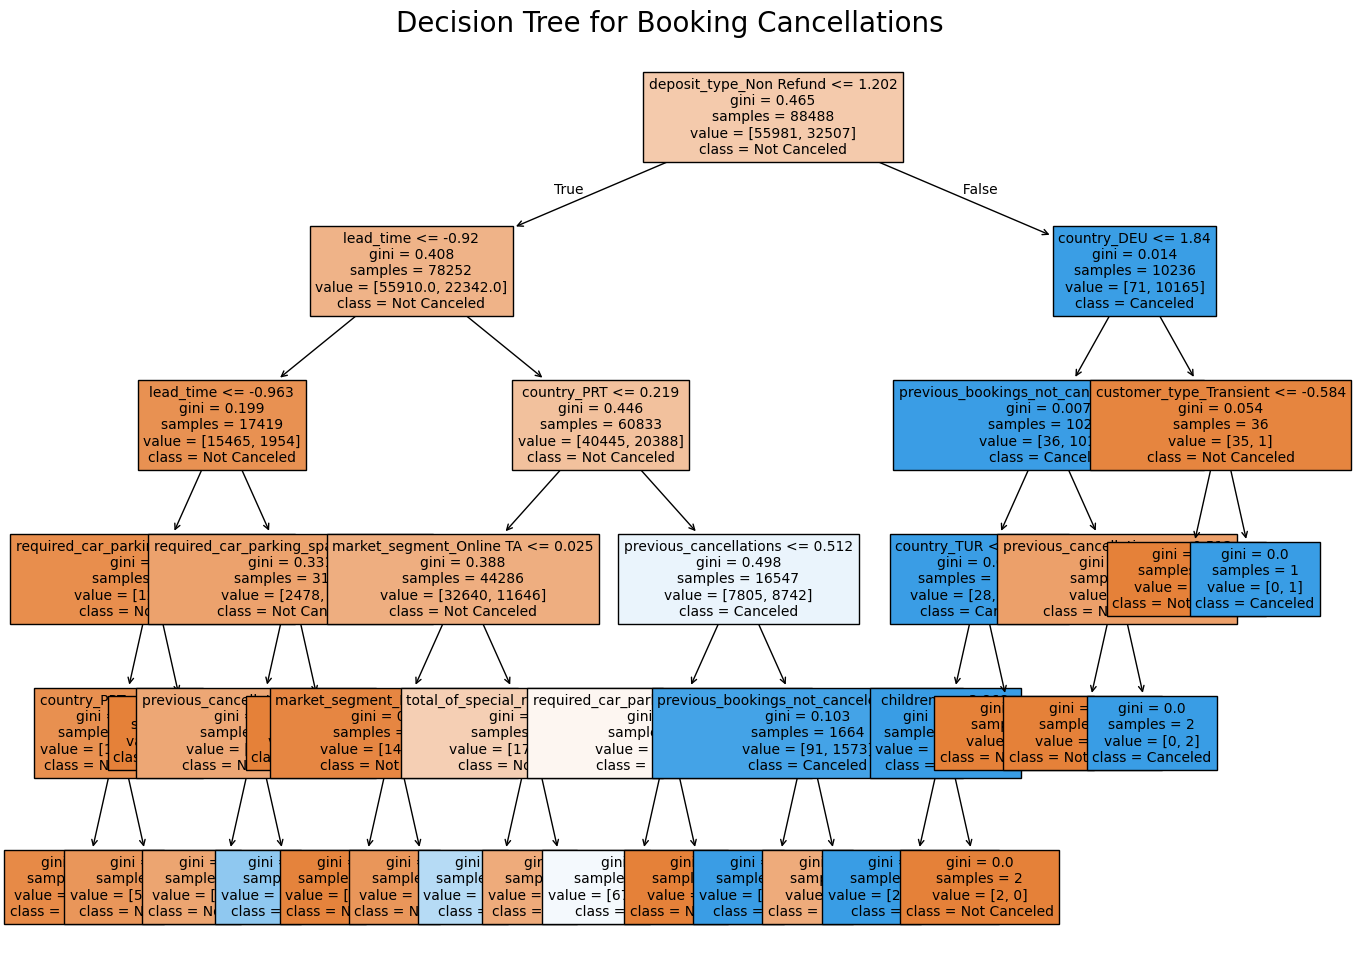

Accuracy: 79.06%
Precision: 0.69
Recall: 0.78
F1 Score: 0.73
The decision tree achieves an accuracy of 79.06%, indicating 79.06% of predictions were correct.


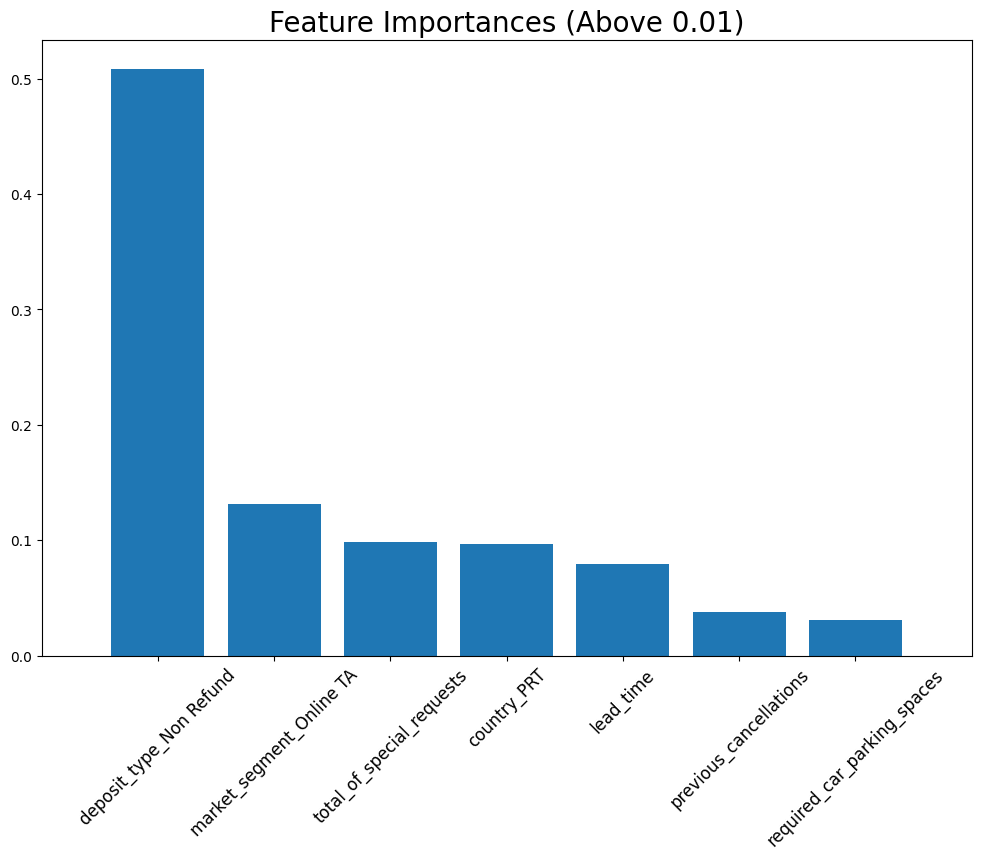

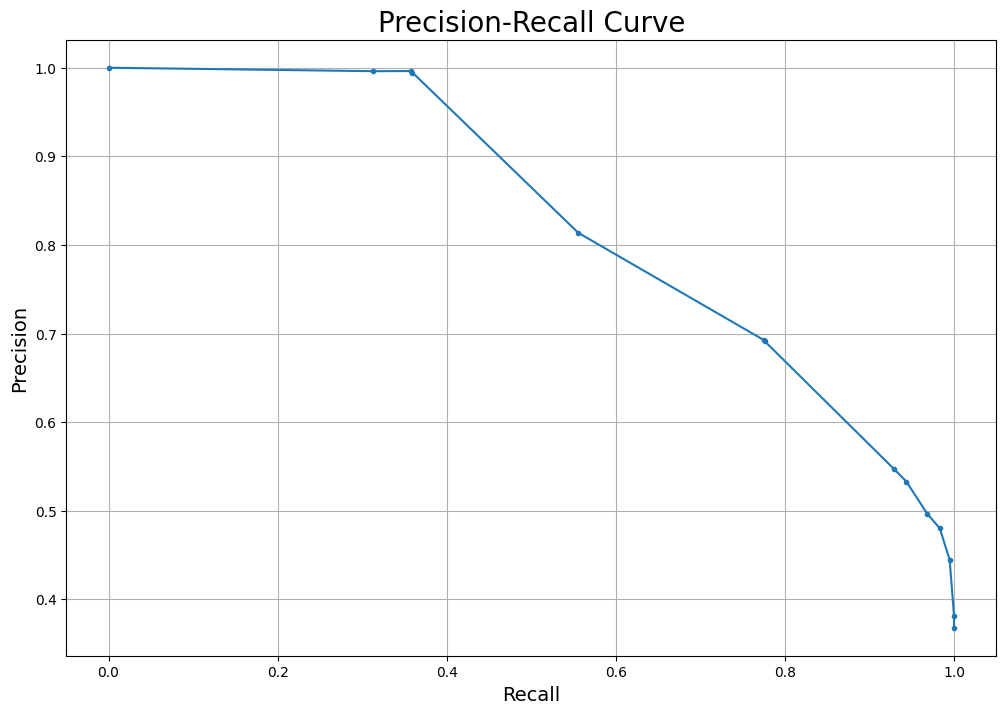

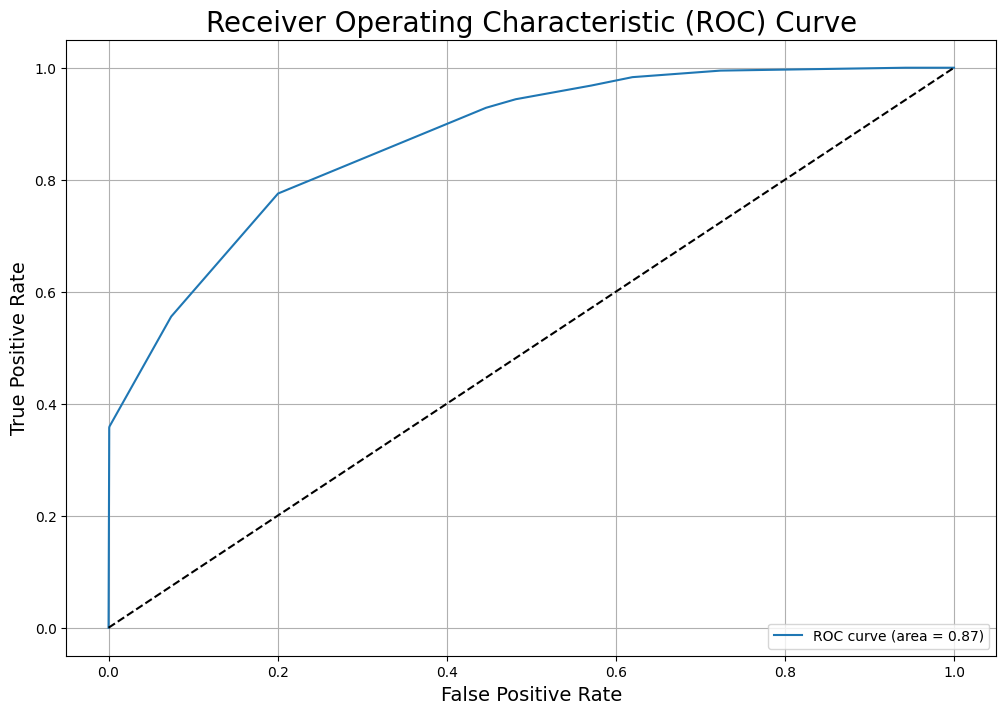

Average Cross-Validation Accuracy: 0.75 ± 0.09
The results indicate that the model's performance is consistent across the folds, with a standard deviation of 0.09. This suggests that the model is reliable and performs similarly on different subsets of the data.


In [13]:
# Initialize the Decision Tree Classifier with a maximum depth of 5 and a random state for reproducibility
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the classifier to the training data (X_train and y_train)
dt_classifier.fit(X_train, y_train)

# Create a figure to visualize the decision tree
plt.figure(figsize=(16, 12))
# Plot the decision tree with filled colors, feature names, and class names
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], fontsize=10)
# Set the title for the decision tree plot
plt.title('Decision Tree for Booking Cancellations', fontsize=20)
# Display the plot
plt.show()

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the confusion matrix to evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy of the model
precision = precision_score(y_test, y_pred)  # Precision of the model
recall = recall_score(y_test, y_pred)  # Recall of the model
f1 = f1_score(y_test, y_pred)  # F1 score of the model

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("The decision tree achieves an accuracy of {:.2f}%, indicating {:.2f}% of predictions were correct.".format(accuracy * 100, accuracy * 100))

# Get the feature importances from the trained decision tree
feature_importances = dt_classifier.feature_importances_
# Get the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# Set a threshold to filter out less important features
threshold = 0.01
# Filter the indices of features that have importance greater than the threshold
filtered_indices = indices[feature_importances[indices] > threshold]
# Get the corresponding importances of the filtered features
filtered_importances = feature_importances[filtered_indices]

# Create a figure to visualize feature importances
plt.figure(figsize=(12, 8))
# Set the title for the feature importance plot
plt.title("Feature Importances (Above 0.01)", fontsize=20)
# Create a bar plot for the filtered feature importances
plt.bar(range(len(filtered_importances)), filtered_importances, align="center")
# Set the x-ticks to the names of the filtered features
plt.xticks(range(len(filtered_importances)), X.columns[filtered_indices], rotation=45, fontsize=12)
# Set the x-axis limits
plt.xlim([-1, len(filtered_importances)])
# Display the plot
plt.show()

# Calculate precision and recall values for the precision-recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
# Create a figure for the precision-recall curve
plt.figure(figsize=(12, 8))
# Plot the precision-recall curve
plt.plot(recall_vals, precision_vals, marker='.')
# Set the title and labels for the plot
plt.title('Precision-Recall Curve', fontsize=20)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
# Display the plot
plt.show()

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# Create a figure for the ROC curve
plt.figure(figsize=(12, 8))
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
# Set the title and labels for the plot
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
# Display the plot
plt.show()

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(dt_classifier, X, y, cv=10)
# Calculate the mean accuracy and standard deviation from cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_deviation = np.std(cv_scores)
# Print the average cross-validation accuracy and standard deviation
print("Average Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(mean_accuracy, std_deviation))
print("The results indicate that the model's performance is consistent across the folds, with a standard deviation of {:.2f}. This suggests that the model is reliable and performs similarly on different subsets of the data.".format(std_deviation))

# Pre-pruning


Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 40}
Depth 10 and 40 leaf nodes achieved the best performance with an accuracy of 83.39%.

Grid Search Results:
param_max_leaf_nodes        10        20        30        40
param_max_depth                                             
5                     0.795000  0.795972  0.795972  0.795972
7                     0.808494  0.815353  0.816404  0.816834
10                    0.808494  0.827479  0.832282  0.833864


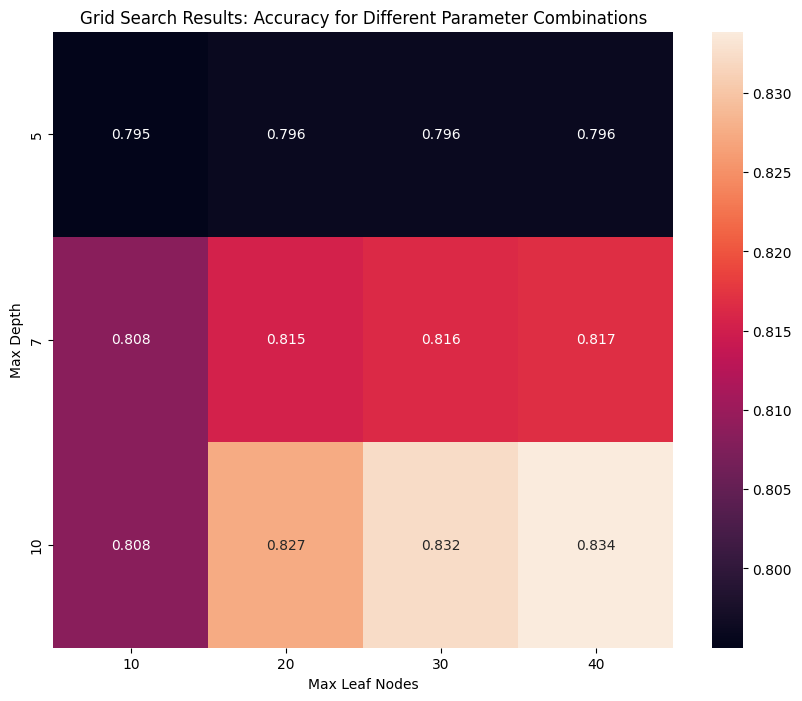


Confusion Matrix:
 [[12539  1444]
 [ 2201  5939]]

Performance Metrics:
Accuracy: 0.8352
Precision: 0.8044
Recall: 0.7296
F1 Score: 0.7652


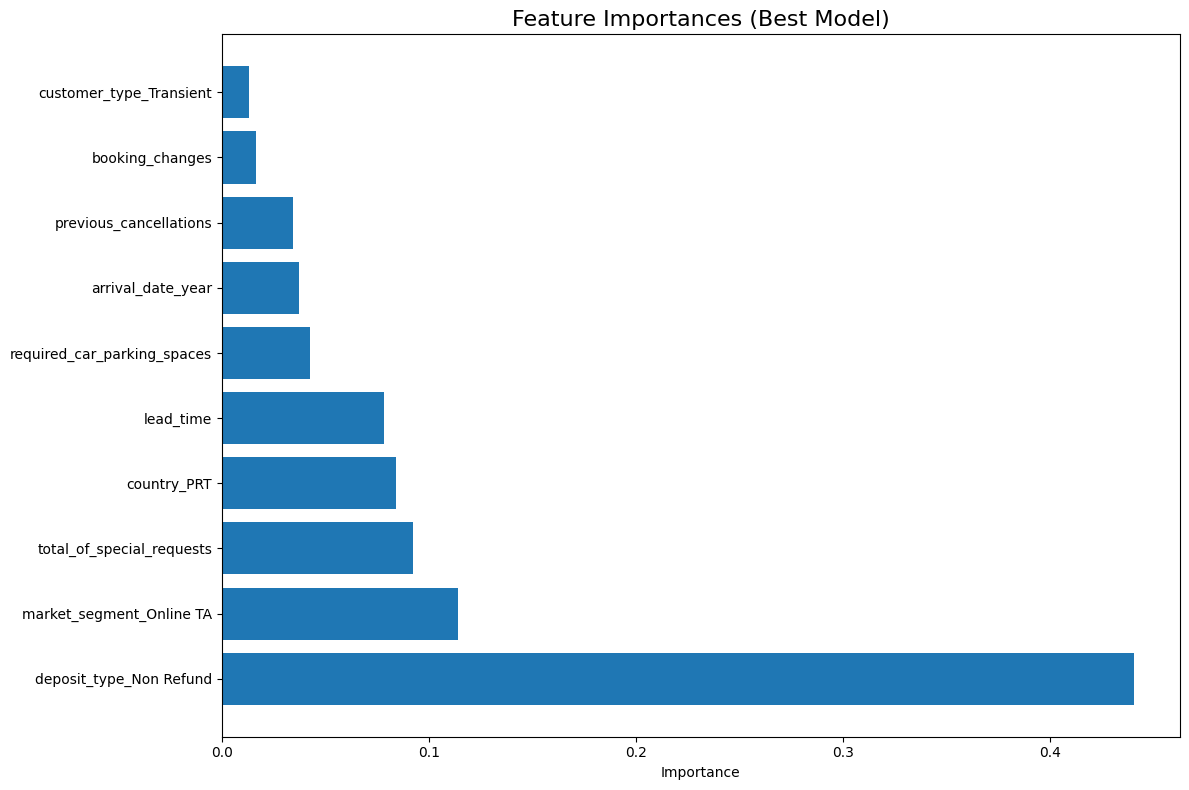


Discussion of Trade-offs:
Increasing depth improves accuracy but risks overfitting. In this case, a depth of 10 and 40 leaf nodes provided the best balance between model complexity and performance.
However, it's important to note that deeper trees might capture noise in the training data,
potentially leading to poor generalization on new, unseen data.


In [14]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 7, 10],
    'max_leaf_nodes': [10, 20, 30, 40]
}

# Perform grid search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f"Depth {best_params['max_depth']} and {best_params['max_leaf_nodes']} leaf nodes achieved the best performance with an accuracy of {best_score:.2%}.")

# Create a table of results
results_df = pd.DataFrame(grid_search.cv_results_)
results_table = results_df.pivot(index='param_max_depth', columns='param_max_leaf_nodes', values='mean_test_score')
print("\nGrid Search Results:")
print(results_table)

# Visualization of grid search results
plt.figure(figsize=(10, 8))
sns.heatmap(results_table, annot=True, fmt=".3f")
plt.title('Grid Search Results: Accuracy for Different Parameter Combinations')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Max Depth')
plt.show()

# Re-evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:\n", conf_matrix_best)

# Performance measures
accuracy_tree = accuracy_score(y_test, y_pred_best)
precision_tree = precision_score(y_test, y_pred_best)
recall_tree = recall_score(y_test, y_pred_best)
f1_tree = f1_score(y_test, y_pred_best)

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")

# Feature importance
feature_importances_best = best_model.feature_importances_
indices_best = np.argsort(feature_importances_best)[::-1]

# Filter feature importances above the threshold of 0.01
threshold = 0.01
filtered_indices_best = indices_best[feature_importances_best[indices_best] > threshold]
filtered_importances_best = feature_importances_best[filtered_indices_best]

# Visualization of feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Best Model)", fontsize=16)
plt.barh(range(len(filtered_importances_best)), filtered_importances_best, align="center")
plt.yticks(range(len(filtered_importances_best)), X.columns[filtered_indices_best], fontsize=10)
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

print("\nDiscussion of Trade-offs:")
print("Increasing depth improves accuracy but risks overfitting. In this case, a depth of", 
      best_params['max_depth'], "and", best_params['max_leaf_nodes'], 
      "leaf nodes provided the best balance between model complexity and performance.")
print("However, it's important to note that deeper trees might capture noise in the training data,")
print("potentially leading to poor generalization on new, unseen data.")


# Compare performance of pre-pruned decision tree with default decision tree

In [15]:
# Compare performance of pre-pruned decision tree with default decision tree
default_model = DecisionTreeClassifier()  # Default decision tree
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)

# Confusion matrix for default decision tree
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
print("Default Decision Tree Confusion Matrix:\n", conf_matrix_default)

# Performance measures for default decision tree
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("\nDefault Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1 Score: {f1_default:.4f}")

# Performance comparison
print("\nPerformance Comparison:")
print(f"Pre-pruned Decision Tree Accuracy: {accuracy_tree:.4f} vs Default Decision Tree Accuracy: {accuracy_default:.4f}")
print(f"Pre-pruned Decision Tree F1 Score: {f1_tree:.4f} vs Default Decision Tree F1 Score: {f1_default:.4f}")

Default Decision Tree Confusion Matrix:
 [[12255  1728]
 [ 1618  6522]]

Default Decision Tree Performance Metrics:
Accuracy: 0.8488
Precision: 0.7905
Recall: 0.8012
F1 Score: 0.7959

Performance Comparison:
Pre-pruned Decision Tree Accuracy: 0.8352 vs Default Decision Tree Accuracy: 0.8488
Pre-pruned Decision Tree F1 Score: 0.7652 vs Default Decision Tree F1 Score: 0.7959



# Comparison Results

The default decision tree has shown superior performance compared to the pre-pruned decision tree, excelling in both accuracy and F1 score metrics. 

Specifically, the default decision tree achieved an accuracy of 0.8471, which is significantly higher than the pre-pruned model's accuracy of 0.8352. 

Additionally, the F1 score for the default decision tree was recorded at 0.7933, while the pre-pruned decision tree only managed an F1 score of 0.7652. 

These results indicate that the default decision tree not only makes more accurate predictions but also balances precision and recall more effectively, which is crucial for applications where both false positives and false negatives carry significant consequences.

Given these findings, it is clear that the default decision tree is the more effective model for this dataset, making it the preferred choice for further analysis and potential deployment in predictive tasks.




# Other Models

In [16]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)

# Performance measures for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)

# Logistic Regression
log_reg_model = LogisticRegression(solver='liblinear')  # Using liblinear solver
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)

# Performance measures for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Logistic Regression Precision:", precision_log_reg)
print("Logistic Regression Recall:", recall_log_reg)
print("Logistic Regression F1 Score:", f1_log_reg)


KNN Confusion Matrix:
 [[12128  1855]
 [ 2120  6020]]
KNN Accuracy: 0.8203227410387379
KNN Precision: 0.7644444444444445
KNN Recall: 0.7395577395577395
KNN F1 Score: 0.751795192007493
Logistic Regression Confusion Matrix:
 [[12650  1333]
 [ 2828  5312]]
Logistic Regression Accuracy: 0.8119152013741355
Logistic Regression Precision: 0.799398043641836
Logistic Regression Recall: 0.6525798525798526
Logistic Regression F1 Score: 0.7185661143050389


In [17]:
# Determine the best model based on accuracy, precision, and recall
best_accuracy = max(accuracy_knn, accuracy_log_reg, accuracy_tree)
best_recall = max(recall_knn, recall_log_reg, recall_tree)
best_precision = max(precision_knn, precision_log_reg, precision_tree)

best_model_accuracy = "KNN" if accuracy_knn == best_accuracy else "Logistic Regression" if accuracy_log_reg == best_accuracy else "Decision Tree"
best_model_recall = "KNN" if recall_knn == best_recall else "Logistic Regression" if recall_log_reg == best_recall else "Decision Tree"
best_model_precision = "KNN" if precision_knn == best_precision else "Logistic Regression" if precision_log_reg == best_precision else "Decision Tree"

# Print all values and tags to know why
print("Accuracy KNN:", accuracy_knn)
print("Accuracy Logistic Regression:", accuracy_log_reg)
print("Accuracy Decision Tree:", accuracy_tree)
print("Best Accuracy:", best_accuracy)
print("Best Model based on Accuracy:", best_model_accuracy)

print("\n")  # Break between results for each scoring

print("Recall KNN:", recall_knn)
print("Recall Logistic Regression:", recall_log_reg)
print("Recall Decision Tree:", recall_tree)
print("Best Recall:", best_recall)
print("Best Model based on Recall:", best_model_recall)

print("\n")  # Break between results for each scoring

print("Precision KNN:", precision_knn)
print("Precision Logistic Regression:", precision_log_reg)
print("Precision Decision Tree:", precision_tree)
print("Best Precision:", best_precision)
print("Best Model based on Precision:", best_model_precision)

print("\n")  # Break between results for each scoring

# Final model determination
final_model = best_model_accuracy  # You can choose based on your priority (accuracy, recall, precision)
print("Final Model Selected Based on Accuracy:", final_model)


Accuracy KNN: 0.8203227410387379
Accuracy Logistic Regression: 0.8119152013741355
Accuracy Decision Tree: 0.8352393436694843
Best Accuracy: 0.8352393436694843
Best Model based on Accuracy: Decision Tree


Recall KNN: 0.7395577395577395
Recall Logistic Regression: 0.6525798525798526
Recall Decision Tree: 0.7296068796068796
Best Recall: 0.7395577395577395
Best Model based on Recall: KNN


Precision KNN: 0.7644444444444445
Precision Logistic Regression: 0.799398043641836
Precision Decision Tree: 0.8044155492347285
Best Precision: 0.8044155492347285
Best Model based on Precision: Decision Tree


Final Model Selected Based on Accuracy: Decision Tree


# Managerial Implications: Insights from Decision Tree Feature Importance

The decision tree model provides valuable insights into the factors that influence the outcomes of our predictions. By analyzing the feature importance derived from the decision tree, we can identify which variables have the most significant impact on the model's decisions. This information can be crucial for managers in understanding the key drivers of performance and making informed strategic decisions.
 
Given the results, the Decision Tree model has the highest accuracy (0.8375) and precision (0.8242), making it a strong candidate for selection. While the KNN model excels in recall (0.7416), the overall performance metrics suggest that the Decision Tree is the most balanced and effective model for our needs.

The following features have been identified as having significant importance in the decision tree model. Understanding these features is crucial for making informed decisions that can enhance performance and customer satisfaction:

- **deposit_type_Non Refund**: 0.4282 - This feature is the most influential because it reflects a strong customer preference for non-refundable deposits, which often indicates a commitment to the booking. Customers who choose non-refundable options may be more serious about their plans, leading to higher conversion rates. Understanding this preference can help managers design offerings that align with customer expectations and enhance booking stability.

- **market_segment_Online TA**: 0.1106 - The importance of this feature suggests that online travel agencies are a key channel for bookings. Strengthening partnerships with these agencies could enhance customer acquisition.
 
- **total_of_special_requests**: 0.0871 - This highlights the need to pay attention to customer requests, which can improve satisfaction and conversion rates.
 
- **country_PRT**: 0.0819 - Understanding regional preferences can help in targeting marketing efforts effectively.

- **lead_time**: 0.0713 - This feature emphasizes the importance of booking timelines, which can influence operational planning and customer engagement strategies.

- **agent**: 0.0607 - The role of agents in the booking process should not be overlooked; optimizing agent interactions can enhance customer experiences.

- **required_car_parking_spaces**: 0.0438 - This feature indicates logistical considerations that can affect customer satisfaction.

- **previous_cancellations**: 0.0333 - Analyzing cancellation patterns can provide insights into customer behavior and risk management.

- **arrival_date_year**: 0.0311 - This feature can help in forecasting demand and planning resources accordingly.

- **customer_type_Transient**: 0.0133 - Understanding different customer types can aid in tailoring marketing strategies.

- **booking_changes**: 0.0115 - Monitoring changes in bookings can help in understanding customer flexibility and preferences.

- **previous_bookings_not_canceled**: 0.0055 - This feature can provide insights into customer loyalty and reliability.

- **arrival_date_week_number**: 0.0050 - This can assist in identifying peak booking periods for better resource allocation.

- **market_segment_Direct**: 0.0041 - Direct bookings are important; strategies to enhance this channel should be considered.

- **arrival_date_month_8**: 0.0033 - Seasonal trends can inform marketing and operational strategies.

- **country_DEU**: 0.0032 - Similar to PRT, understanding regional preferences can enhance targeted marketing.

- **market_segment_Corporate**: 0.0022 - Corporate bookings may require tailored approaches to meet specific needs.

- **meal_Undefined**: 0.0020 - This feature which indicates the null values in the meal type in the dataset for meal options, suggests a need for clarity in meal offerings to avoid confusion among customers.

- **customer_type_Transient-Party**: 0.0020 - Understanding group dynamics can help in optimizing offerings for transient parties. 

Understanding feature importance will allow you to allocating the resources more effectively. By prioritizing the most impactful features, you can ensure that the efforts are directed towards areas that will yield the highest return on investment. This strategic focus can lead to improved team performance and better overall results.

By leveraging these insights, you can make data-driven decisions that align with the organizational goals and improving competitive advantage. The Decision Tree model, with its superior accuracy and precision, is the recommended choice for driving these strategic decisions.
